In [1]:
# Basic Imports
import sys
sys.path.insert(1, "../../")

import utils
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

# Imports for data preprocessing.
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Tensorflow imports
import tensorflow as tf

In [2]:
# Disable GPU
# tf.config.set_visible_devices([], 'GPU')

In [3]:
# Constants
DATA_FILE_NAME = '../../Data/final_crypto_data.csv'
SELECTED_MONTHS = [10,11,12,1,2,3]
SELECTED_FEATURES = [
        'reddit_compound_polarity',
		# 'quote_volume_24h',
        # 'volume_change_24h',
        # 'percent_change_1h',
        # 'percent_change_24h',
        # 'percent_change_7d',
		# 'high_24h',
        # 'last_24h',
        # 'bid_24h',
        # 'vwap_24h',
        # 'volume_24h',
        # 'low_24h',
        # 'ask_24h',
        # 'open_24h',
        'volume_1min',
        'high_1min',
        'low_1min',
        'open_1min',
        'close_1min'
    ]

In [4]:
df = pd.read_csv(DATA_FILE_NAME)
df

,Unnamed: 0,_id,high_24h,last_24h,unix_timestamp,bid_24h,vwap_24h,volume_24h,low_24h,ask_24h,...,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,reddit_compound_polarity
0,0,627127fabbd592fa2c7f25a9,62971.54,62561.13,1635527368,62559.74,60908.08,5113.537402,56425.0,62561.13,...,-0.314446,2.307206,2.108769,26.873643,29.933036,49.972913,1.179682e+12,43.4826,1.313676e+12,0.000834
1,1,627127fabbd592fa2c7f25aa,62971.54,62580.05,1635527309,62571.40,60907.24,5111.938615,56425.0,62580.05,...,-0.422853,2.137546,2.146984,26.873643,29.917416,49.972913,1.179209e+12,43.4826,1.313150e+12,0.000834
2,2,627127fabbd592fa2c7f25ab,62971.54,62591.17,1635527428,62582.19,60908.89,5115.569587,56425.0,62596.03,...,-0.365020,2.383982,2.150485,26.873643,29.997052,49.972913,1.179605e+12,43.4826,1.313590e+12,0.000834
3,3,627127fabbd592fa2c7f25ac,62971.54,62590.43,1635527672,62572.06,60909.91,5117.061581,56425.0,62590.43,...,-0.311393,2.375399,2.464668,26.873643,30.044297,49.972913,1.180352e+12,43.4826,1.314422e+12,0.000834
4,4,627127fabbd592fa2c7f25ad,62971.54,62600.43,1635527551,62587.09,60909.54,5117.193435,56425.0,62606.26,...,-0.379612,2.422122,2.443523,26.873643,30.074340,49.972913,1.180216e+12,43.4826,1.314271e+12,0.000834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246786,246786,62712800bbd592fa2c82e9ab,38786.95,38327.07,1651352348,38304.93,38539.95,566.041421,38160.4,38326.82,...,-0.363037,-0.606400,-3.693057,-16.314320,-12.909292,1.689268,7.293839e+11,42.0516,8.050246e+11,0.000800
246787,246787,62712800bbd592fa2c82e9ac,38786.95,38332.23,1651352290,38314.66,38539.96,566.041421,38160.4,38335.17,...,-0.344114,-0.592877,-3.713096,-16.308426,-12.839252,1.692403,7.293371e+11,42.0489,8.049729e+11,0.000800
246788,246788,62712800bbd592fa2c82e9ad,38786.95,38329.94,1651352410,38317.93,38539.93,566.041421,38160.4,38330.19,...,-0.345789,-0.598362,-3.683293,-16.296175,-12.917047,1.698228,7.294364e+11,42.0546,8.050826e+11,0.000800
246789,246789,62712800bbd592fa2c82e9ae,38786.95,38344.79,1651352469,38321.67,38539.90,566.041421,38160.4,38344.79,...,-0.354289,-0.602308,-3.686438,-16.303936,-12.928782,1.698071,7.293828e+11,42.0515,8.050234e+11,0.000800


In [5]:
# Drop unnecessary columns
df = utils.setDateTimeAsIndex(df)
df = utils.filterColumns(df, SELECTED_FEATURES)
df = utils.filterInMonths(df, SELECTED_MONTHS)
df

,reddit_compound_polarity,volume_1min,high_1min,low_1min,open_1min,close_1min
datetime,,,,,,
2021-10-29 17:09:28,0.000834,1.425169,62565.90,62539.20,62545.45,62561.86
2021-10-29 17:08:29,0.000834,0.046548,62580.05,62555.88,62555.88,62577.47
2021-10-29 17:10:28,0.000834,2.112533,62597.65,62555.02,62560.95,62597.64
2021-10-29 17:14:32,0.000834,0.596406,62615.00,62590.43,62603.62,62590.43
2021-10-29 17:12:31,0.000834,0.657752,62600.43,62577.18,62577.18,62600.43
...,...,...,...,...,...,...
2022-03-29 15:03:51,-0.260219,0.032706,47841.78,47779.93,47787.41,47841.78
2022-03-29 15:02:51,-0.329272,1.175399,47839.85,47817.06,47823.15,47817.06
2022-03-29 15:04:51,-0.260219,0.016080,47842.74,47839.81,47842.74,47839.81


In [6]:
# check for null values per column
print("NaN values per column count: \n")
df.isna().sum()

NaN values per column count: 



reddit_compound_polarity    0
volume_1min                 0
high_1min                   0
low_1min                    0
open_1min                   0
close_1min                  0
dtype: int64

In [7]:
values = df.values
i = 1

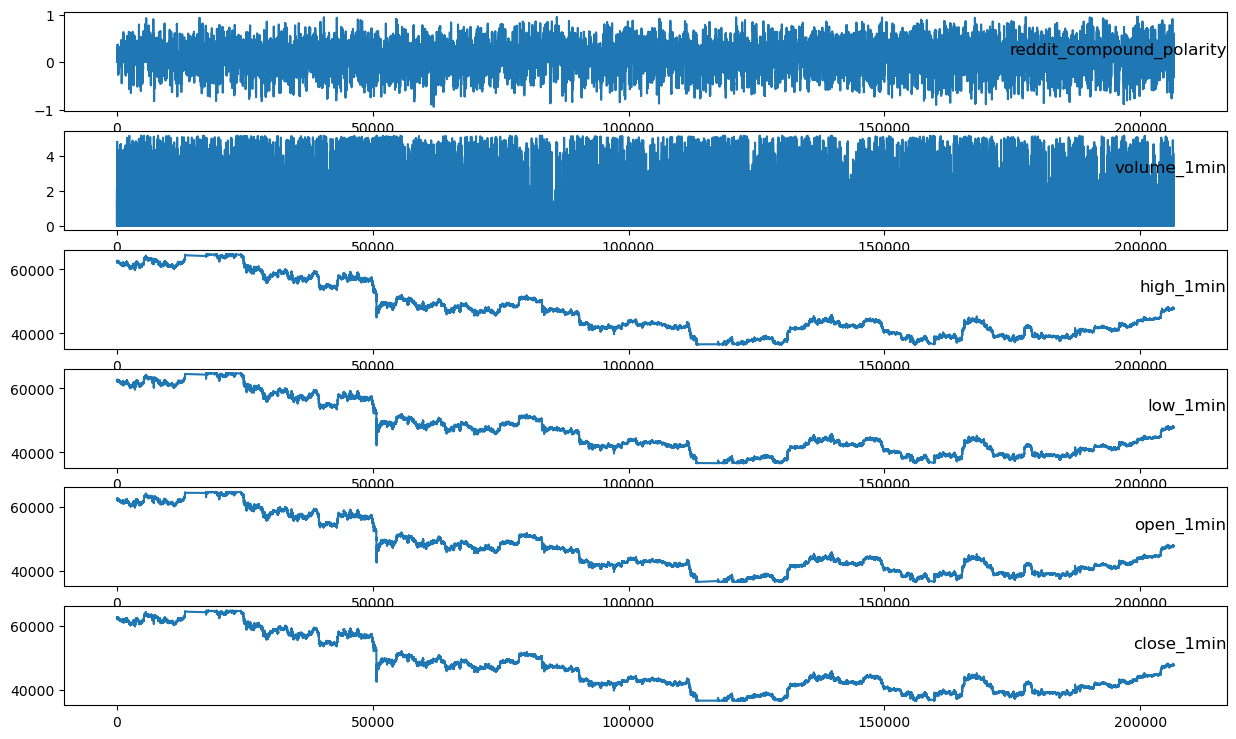

In [8]:
# plot each column
plt.figure(figsize=(15,9))
for group in range(len(SELECTED_FEATURES)) :
	plt.subplot(len(SELECTED_FEATURES), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

# LSTM Data Preparation

In [9]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True, doPrints=False):
	"""
	:param data: Ta data pou theloume na metasximatisoume se numpy Array
	:param n_in: to plithos ton Lags pou tha exei i input series (X)
	:param n_out: to plithos ton Lags pou tha exei i output series (y)
	:param dropnan: ama theloume na kanoume drop ta nan valuws
	:return: epistrefei tin metasximatismeni lista se multivariate time series.
	"""

	# vreiskei to n_vars
	# an ta data einai list = 1
	# alliws pernei to shape ton data.
	n_vars = 1 if type(data) is list else data.shape[1]

	# kanoume ta data DataFrame
	mDf = pd.DataFrame(data)
	if doPrints:
		print(mDf)

	# ftiaxnei 2 adies listes. mia fia ta
	cols, names = list(), list()
	if doPrints:
		print(n_vars)

	# ftiaxnoume to input series X. (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		# kanoume append sto cols to dataframe olistimeno kata i rows
		cols.append(mDf.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

	# ftiaxnoume to forecast sequence y (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(mDf.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

	if doPrints:
		print(cols)
		print(names)

	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [10]:
# get dataframe values.
values = df.values
values

array([[ 8.33660422e-04,  1.42516865e+00,  6.25659000e+04,
         6.25392000e+04,  6.25454500e+04,  6.25618600e+04],
       [ 8.33660422e-04,  4.65481700e-02,  6.25800500e+04,
         6.25558800e+04,  6.25558800e+04,  6.25774700e+04],
       [ 8.33660422e-04,  2.11253286e+00,  6.25976500e+04,
         6.25550200e+04,  6.25609500e+04,  6.25976400e+04],
       ...,
       [-2.60219255e-01,  1.60800000e-02,  4.78427400e+04,
         4.78398100e+04,  4.78427400e+04,  4.78398100e+04],
       [-3.75016442e-02,  3.85512800e-02,  4.78525200e+04,
         4.78317700e+04,  4.78317700e+04,  4.78525200e+04],
       [-3.77494012e-02,  2.52900000e-02,  4.78819100e+04,
         4.78567900e+04,  4.78794400e+04,  4.78589300e+04]])

# Normalize Dataframe Values.

In [11]:
# Ensure all data are float.
values = values.astype('float32')
values

array([[ 8.3366042e-04,  1.4251686e+00,  6.2565898e+04,  6.2539199e+04,
         6.2545449e+04,  6.2561859e+04],
       [ 8.3366042e-04,  4.6548169e-02,  6.2580051e+04,  6.2555879e+04,
         6.2555879e+04,  6.2577469e+04],
       [ 8.3366042e-04,  2.1125329e+00,  6.2597648e+04,  6.2555020e+04,
         6.2560949e+04,  6.2597641e+04],
       ...,
       [-2.6021925e-01,  1.6080000e-02,  4.7842738e+04,  4.7839809e+04,
         4.7842738e+04,  4.7839809e+04],
       [-3.7501644e-02,  3.8551278e-02,  4.7852520e+04,  4.7831770e+04,
         4.7831770e+04,  4.7852520e+04],
       [-3.7749402e-02,  2.5289999e-02,  4.7881910e+04,  4.7856789e+04,
         4.7879441e+04,  4.7858930e+04]], dtype=float32)

In [12]:
# Normalize Continues Features.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)
scaled_values

array([[0.4978444 , 0.27705094, 0.9250517 , 0.9248632 , 0.9246783 ,
        0.9253454 ],
       [0.4978444 , 0.0090489 , 0.92555547, 0.9254569 , 0.92504954,
        0.9259012 ],
       [0.4978444 , 0.41067365, 0.9261818 , 0.92542636, 0.92523   ,
        0.92661905],
       ...,
       [0.36006844, 0.00312593, 0.40101087, 0.4016409 , 0.40132523,
        0.40126073],
       [0.47761217, 0.00749432, 0.40135908, 0.4013548 , 0.40093482,
        0.40171325],
       [0.47748142, 0.00491634, 0.40240514, 0.4022454 , 0.40263176,
        0.40194142]], dtype=float32)

In [13]:
# specify the number of lag hours
n_hours = 15
n_features = len(SELECTED_FEATURES)
n_obs = n_hours * n_features

In [14]:
# prepare data for lstm
reframed = series_to_supervised(scaled_values, n_in=n_hours,n_out=1)
reframed

,var1(t-15),var2(t-15),var3(t-15),var4(t-15),var5(t-15),var6(t-15),var1(t-14),var2(t-14),var3(t-14),var4(t-14),...,var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
15,0.497844,0.277051,0.925052,0.924863,0.924678,0.925345,0.497844,0.009049,0.925555,0.925457,...,0.927724,0.925746,0.925639,0.927521,0.497845,0.268757,0.924636,0.922974,0.923524,0.924262
16,0.497844,0.009049,0.925555,0.925457,0.925050,0.925901,0.497844,0.410674,0.926182,0.925426,...,0.924636,0.922974,0.923524,0.924262,0.497404,0.233109,0.927363,0.926487,0.927297,0.927801
17,0.497844,0.410674,0.926182,0.925426,0.925230,0.926619,0.497845,0.115941,0.926800,0.926687,...,0.927363,0.926487,0.927297,0.927801,0.497404,0.121320,0.927977,0.927622,0.927635,0.928037
18,0.497845,0.115941,0.926800,0.926687,0.926749,0.926363,0.497845,0.127866,0.926281,0.926215,...,0.927977,0.927622,0.927635,0.928037,0.497482,0.126817,0.927824,0.927252,0.926845,0.928010
19,0.497845,0.127866,0.926281,0.926215,0.925808,0.926718,0.497845,0.201259,0.926382,0.926892,...,0.927824,0.927252,0.926845,0.928010,0.497589,0.396712,0.928478,0.927236,0.927680,0.927469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206562,0.477145,0.010078,0.400747,0.400588,0.400773,0.401101,0.477145,0.340969,0.400783,0.400110,...,0.401137,0.401787,0.401367,0.401491,0.360068,0.006358,0.400977,0.399510,0.399356,0.401331
206563,0.477145,0.340969,0.400783,0.400110,0.400269,0.401137,0.477145,0.002858,0.400082,0.400529,...,0.400977,0.399510,0.399356,0.401331,0.323625,0.228496,0.400908,0.400831,0.400628,0.400451
206564,0.477145,0.002858,0.400082,0.400529,0.400144,0.400436,0.477145,0.005833,0.402148,0.401934,...,0.400908,0.400831,0.400628,0.400451,0.360068,0.003126,0.401011,0.401641,0.401325,0.401261
206565,0.477145,0.005833,0.402148,0.401934,0.401514,0.402502,0.477266,0.014019,0.401986,0.401958,...,0.401011,0.401641,0.401325,0.401261,0.477612,0.007494,0.401359,0.401355,0.400935,0.401713


# Define And Fit Model

In [15]:
def train_test_valid_split(total_x, total_y, train_size=0.8, valid_size=0.1) :
    train_index = int(len(total_x) * train_size)
    valid_index = int(len(total_x) * valid_size)

    X_train, y_train = total_x[0 :train_index], total_y[0 :train_index]
    X_valid, y_valid = total_x[train_index :train_index + valid_index], total_y[train_index :train_index + valid_index]
    X_test, y_test = total_x[train_index + valid_index :], total_y[train_index + valid_index :]

    print("-------- train test valid split --------")
    print(len(X_train)), print(len(y_train))
    print(len(X_valid)), print(len(y_valid))
    print(len(X_test)), print(len(y_test))
    print("----------------------------------------")

    return np.array(X_train), \
           np.array(y_train), \
           np.array(X_valid), \
           np.array(y_valid), \
           np.array(X_test), \
           np.array(y_test)

In [16]:
# split into train and test sets
values = reframed.values
# cutoff = round(0.70 * len(values))
# values = values[cutoff:,:]
values

array([[0.4978444 , 0.27705094, 0.9250517 , ..., 0.922974  , 0.92352414,
        0.9242618 ],
       [0.4978444 , 0.0090489 , 0.92555547, ..., 0.9264866 , 0.9272971 ,
        0.92780066],
       [0.4978444 , 0.41067365, 0.9261818 , ..., 0.9276222 , 0.92763495,
        0.9280369 ],
       ...,
       [0.47714525, 0.00285766, 0.40008163, ..., 0.4016409 , 0.40132523,
        0.40126073],
       [0.47714525, 0.00583274, 0.40214753, ..., 0.4013548 , 0.40093482,
        0.40171325],
       [0.47726622, 0.01401914, 0.40198553, ..., 0.4022454 , 0.40263176,
        0.40194142]], dtype=float32)

In [17]:
X =  values[:,:n_obs]
X

array([[0.4978444 , 0.27705094, 0.9250517 , ..., 0.9257456 , 0.92563915,
        0.9275205 ],
       [0.4978444 , 0.0090489 , 0.92555547, ..., 0.922974  , 0.92352414,
        0.9242618 ],
       [0.4978444 , 0.41067365, 0.9261818 , ..., 0.9264866 , 0.9272971 ,
        0.92780066],
       ...,
       [0.47714525, 0.00285766, 0.40008163, ..., 0.4008311 , 0.40062797,
        0.40045094],
       [0.47714525, 0.00583274, 0.40214753, ..., 0.4016409 , 0.40132523,
        0.40126073],
       [0.47726622, 0.01401914, 0.40198553, ..., 0.4013548 , 0.40093482,
        0.40171325]], dtype=float32)

In [18]:
y = values[:,-1]
y

array([0.9242618 , 0.92780066, 0.9280369 , ..., 0.40126073, 0.40171325,
       0.40194142], dtype=float32)

In [19]:
train_X, train_y, valid_X, valid_y, test_X, test_y = train_test_valid_split(
	X,
	y,
	train_size=0.8,
	valid_size=0.1
)
print("----------------------------")
print(f"-------- Train X: {train_X.shape}, Train y: {train_y.shape} --------")
print(f"-------- Valid X: {valid_X.shape}, Valid y: {valid_y.shape} --------")
print(f"-------- Test X: {test_X.shape}, Test y: {test_y.shape} --------")
print("----------------------------\n")

-------- train test valid split --------
165241
165241
20655
20655
20656
20656
----------------------------------------
----------------------------
-------- Train X: (165241, 90), Train y: (165241,) --------
-------- Valid X: (20655, 90), Valid y: (20655,) --------
-------- Test X: (20656, 90), Test y: (20656,) --------
----------------------------



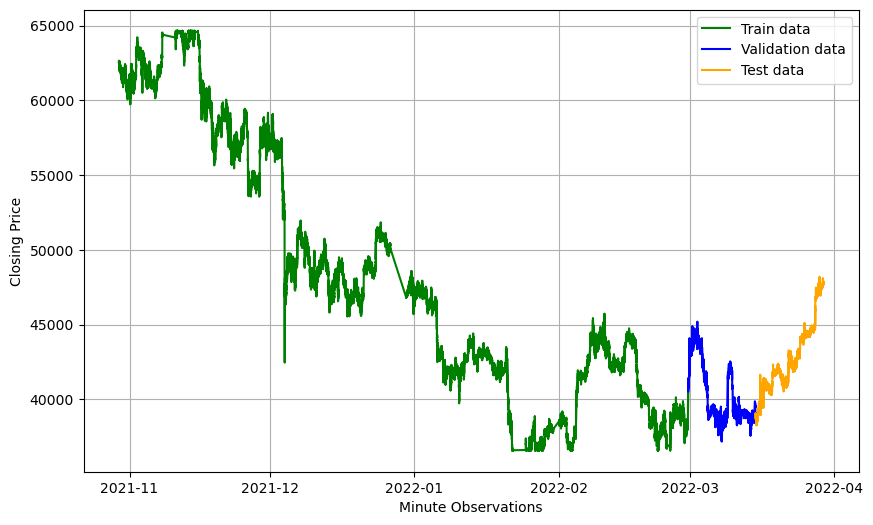

In [20]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(df['close_1min'][:len(train_y)], 'green', label='Train data')
plt.plot(df['close_1min'][len(train_y):len(train_y)+len(valid_y)], 'blue', label='Validation data')
plt.plot(df['close_1min'][len(train_y)+len(valid_y):], 'orange', label='Test data')
plt.legend()

In [21]:
train_X

array([[0.4978444 , 0.27705094, 0.9250517 , ..., 0.9257456 , 0.92563915,
        0.9275205 ],
       [0.4978444 , 0.0090489 , 0.92555547, ..., 0.922974  , 0.92352414,
        0.9242618 ],
       [0.4978444 , 0.41067365, 0.9261818 , ..., 0.9264866 , 0.9272971 ,
        0.92780066],
       ...,
       [0.48199117, 0.41430113, 0.14780474, ..., 0.14359057, 0.14316428,
        0.14531565],
       [0.48531345, 0.5494657 , 0.14994311, ..., 0.14450896, 0.14466476,
        0.144194  ],
       [0.47312593, 0.54020834, 0.1402173 , ..., 0.14358664, 0.14343286,
        0.14317894]], dtype=float32)

In [22]:
valid_X

array([[0.48804408, 0.38622773, 0.14801967, ..., 0.1454202 , 0.14499402,
        0.14501274],
       [0.48804408, 0.38360924, 0.14766908, ..., 0.1482122 , 0.14778602,
        0.14800084],
       [0.48673904, 0.11623003, 0.14506984, ..., 0.14827621, 0.14785016,
        0.14786911],
       ...,
       [0.5209723 , 0.03527928, 0.08679557, ..., 0.0874536 , 0.087026  ,
        0.08738708],
       [0.5209723 , 0.19363979, 0.08618224, ..., 0.0846349 , 0.08494473,
        0.08422101],
       [0.5186155 , 0.00167572, 0.08616698, ..., 0.08785653, 0.08742893,
        0.08744299]], dtype=float32)

In [23]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
valid_X = valid_X.reshape((valid_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, valid_X.shape, valid_y.shape)

(165241, 15, 6) (165241,) (20655, 15, 6) (20655,)


In [24]:
 # Network Configurations
EPOCHS = 50
BATCH_SIZE = 512

In [25]:
# design network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(
	128,
	# return_sequences=True,
	# activation='relu',
	# unroll=True,
	input_shape=(train_X.shape[1], train_X.shape[2]),
))
# model.add(Dropout(0.2))
# model.add(tf.keras.layers.LSTM(
# 	50,
# 	activation='relu',
# 	# unroll=True,
# ))
# model.add(Dropout(0.2))
# model.add(Dense(BATCH_SIZE))
# model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

Metal device set to: Apple M1 Pro


2023-01-15 15:13:13.421540: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-15 15:13:13.421656: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [26]:
# fit network
history = model.fit(
	train_X,
	train_y,
	epochs=EPOCHS,
	batch_size=BATCH_SIZE,
	validation_data=(valid_X, valid_y),
	verbose=2,
	shuffle=False
)

Epoch 1/50


2023-01-15 15:13:13.717282: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-15 15:13:14.538976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-15 15:13:14.655240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-15 15:13:14.888308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-15 15:13:18.633205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-15 15:13:18.673583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


323/323 - 5s - loss: 0.0061 - val_loss: 1.4830e-04 - 5s/epoch - 16ms/step
Epoch 2/50
323/323 - 4s - loss: 4.5683e-04 - val_loss: 5.9222e-05 - 4s/epoch - 11ms/step
Epoch 3/50
323/323 - 4s - loss: 2.5192e-04 - val_loss: 3.0427e-05 - 4s/epoch - 13ms/step
Epoch 4/50
323/323 - 4s - loss: 1.5582e-04 - val_loss: 1.6681e-05 - 4s/epoch - 11ms/step
Epoch 5/50
323/323 - 3s - loss: 1.0141e-04 - val_loss: 1.0243e-05 - 3s/epoch - 11ms/step
Epoch 6/50
323/323 - 4s - loss: 7.6243e-05 - val_loss: 8.4417e-06 - 4s/epoch - 11ms/step
Epoch 7/50
323/323 - 4s - loss: 6.5180e-05 - val_loss: 8.4250e-06 - 4s/epoch - 12ms/step
Epoch 8/50
323/323 - 4s - loss: 5.3223e-05 - val_loss: 9.4775e-06 - 4s/epoch - 12ms/step
Epoch 9/50
323/323 - 4s - loss: 7.0920e-05 - val_loss: 1.6782e-05 - 4s/epoch - 11ms/step
Epoch 10/50
323/323 - 3s - loss: 1.2284e-04 - val_loss: 2.0917e-05 - 3s/epoch - 11ms/step
Epoch 11/50
323/323 - 3s - loss: 2.0505e-04 - val_loss: 1.1353e-05 - 3s/epoch - 11ms/step
Epoch 12/50
323/323 - 4s - loss: 1

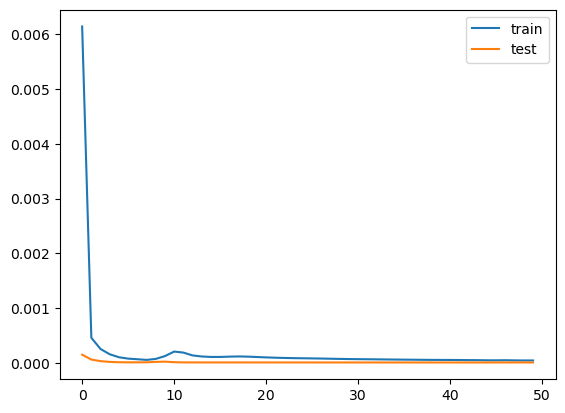

In [27]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [28]:
# make a prediction
yhat = model.predict(valid_X)
valid_X = valid_X.reshape((valid_X.shape[0], n_hours*n_features))
valid_X

  1/646 [..............................] - ETA: 3:48

2023-01-15 15:16:12.484982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-15 15:16:12.527601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


646/646 [==============================] - 3s 4ms/step


array([[0.48804408, 0.38622773, 0.14801967, ..., 0.1454202 , 0.14499402,
        0.14501274],
       [0.48804408, 0.38360924, 0.14766908, ..., 0.1482122 , 0.14778602,
        0.14800084],
       [0.48673904, 0.11623003, 0.14506984, ..., 0.14827621, 0.14785016,
        0.14786911],
       ...,
       [0.5209723 , 0.03527928, 0.08679557, ..., 0.0874536 , 0.087026  ,
        0.08738708],
       [0.5209723 , 0.19363979, 0.08618224, ..., 0.0846349 , 0.08494473,
        0.08422101],
       [0.5186155 , 0.00167572, 0.08616698, ..., 0.08785653, 0.08742893,
        0.08744299]], dtype=float32)

In [29]:
# invert scaling for forecast
inv_yhat = np.concatenate((valid_X[:, -(n_features-1):], yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]

In [30]:
# invert scaling for actual
valid_y_new = valid_y.reshape((len(valid_y), 1))
inv_y = np.concatenate((valid_X[:, -(n_features-1):], valid_y_new), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

In [31]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 71.153


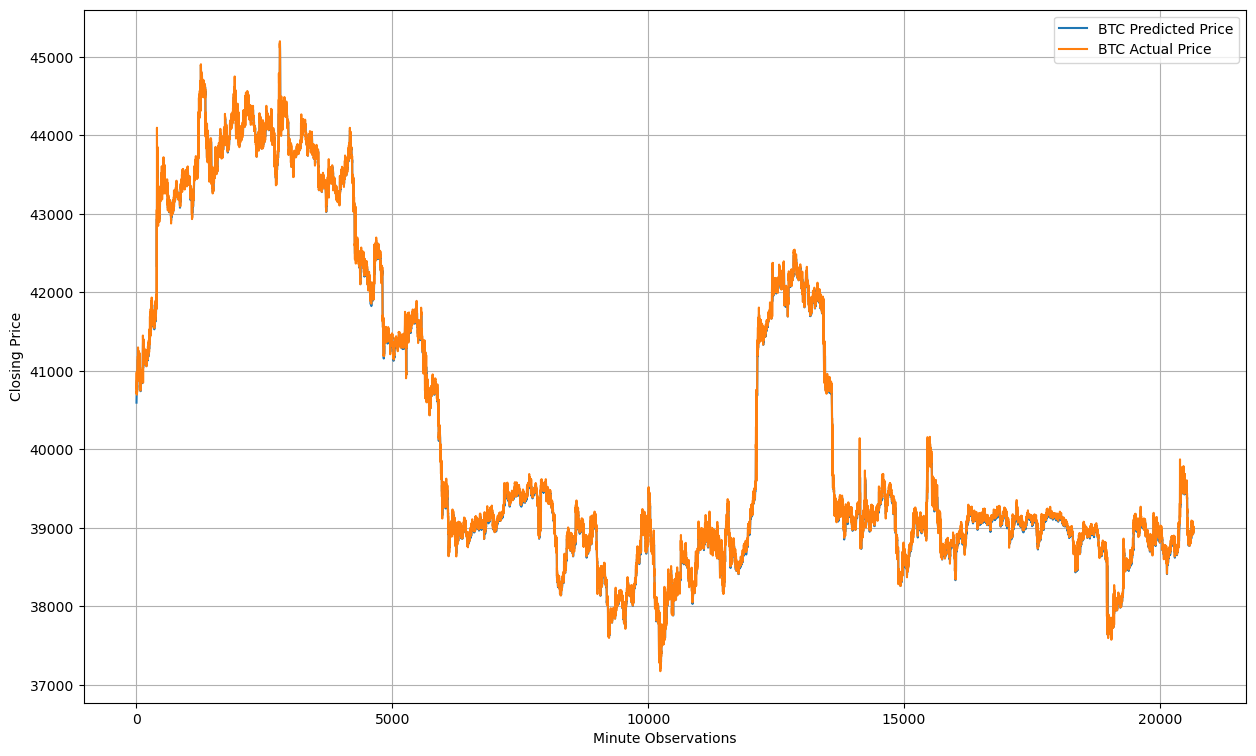

In [32]:
plt.figure(figsize=(15,9))
plt.grid(True)

plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(inv_yhat, label='BTC Predicted Price')
plt.plot(inv_y, label='BTC Actual Price')
plt.legend()

# Predict test values

In [33]:
test_yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
test_X

646/646 [==============================] - 2s 4ms/step


array([[0.5209723 , 0.        , 0.08602452, ..., 0.08507442, 0.08504128,
        0.08466053],
       [0.5209723 , 0.1802076 , 0.08623219, ..., 0.08642209, 0.08599448,
        0.08600831],
       [0.5186155 , 0.11627457, 0.08557224, ..., 0.0859127 , 0.0854851 ,
        0.08549893],
       ...,
       [0.47714525, 0.00285766, 0.40008163, ..., 0.4008311 , 0.40062797,
        0.40045094],
       [0.47714525, 0.00583274, 0.40214753, ..., 0.4016409 , 0.40132523,
        0.40126073],
       [0.47726622, 0.01401914, 0.40198553, ..., 0.4013548 , 0.40093482,
        0.40171325]], dtype=float32)

In [34]:
# invert scaling for forecast
test_inv_yhat = np.concatenate((test_X[:, -(n_features-1):], test_yhat), axis=1)
test_inv_yhat = scaler.inverse_transform(test_inv_yhat)
test_inv_yhat = test_inv_yhat[:,-1]

In [35]:
# invert scaling for actual
test_y_new = test_y.reshape((len(test_y), 1))
test_inv_y = np.concatenate((test_X[:, -(n_features-1):], test_y_new), axis=1)
test_inv_y = scaler.inverse_transform(test_inv_y)
test_inv_y = test_inv_y[:,-1]

In [36]:
# calculate RMSE
rmse = sqrt(mean_squared_error(test_inv_y, test_inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 58.697


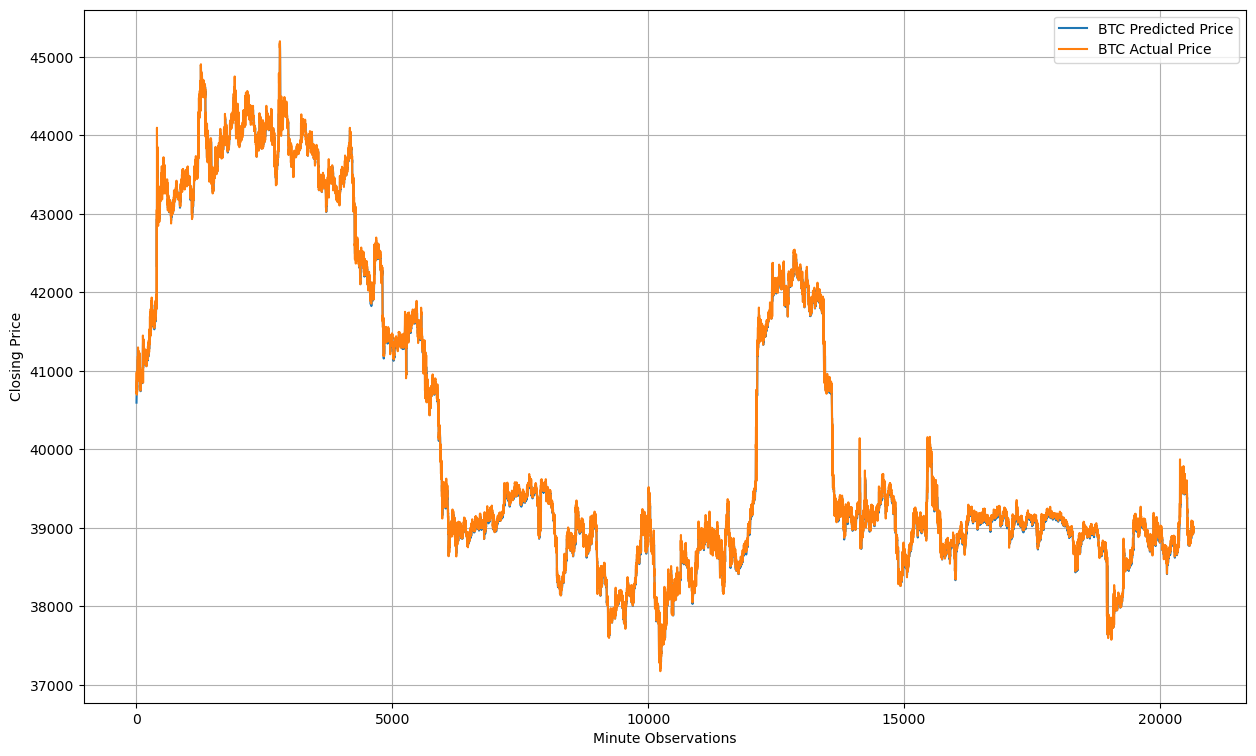

In [37]:
plt.figure(figsize=(15,9))
plt.grid(True)

plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(inv_yhat, label='BTC Predicted Price')
plt.plot(inv_y, label='BTC Actual Price')
plt.legend()